# 속성 선택 ( Feature selection )

명확히 의존성을 보여주는 모든 속성 짝에 대해 일부를 제거할지 둘로부터 더 새롭고 명확한 하나의 속성이 되게 디자인할지를 생각한다.

## 필터링(filtering)

중복된 속성 탐지

### Correlation ( pearson )

In [1]:
# published by PACKT Publishing
#
# It is made available under the MIT License

import os

from matplotlib import pylab
import numpy as np
import scipy
from scipy.stats import norm, pearsonr
%matplotlib inline
from utils import CHART_DIR


def _plot_correlation_func(x, y):

    r, p = pearsonr(x, y)
    title = "Cor($X_1$, $X_2$) = %.3f" % r
    pylab.scatter(x, y)
    pylab.title(title)
    pylab.xlabel("$X_1$")
    pylab.ylabel("$X_2$")

    f1 = scipy.poly1d(scipy.polyfit(x, y, 1))
    pylab.plot(x, f1(x), "r--", linewidth=2)
    # pylab.xticks([w*7*24 for w in [0,1,2,3,4]], ['week %i'%(w+1) for w in
    # [0,1,2,3,4]])

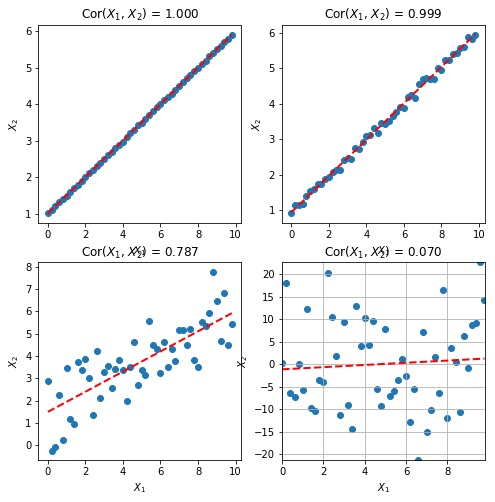

In [2]:
np.random.seed(0)  # to reproduce the data later on
pylab.clf()
pylab.figure(num=None, figsize=(8, 8))

x = np.arange(0, 10, 0.2)

pylab.subplot(221)
y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
_plot_correlation_func(x, y)

pylab.subplot(222)
y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
_plot_correlation_func(x, y)

pylab.subplot(223)
y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
_plot_correlation_func(x, y)

pylab.subplot(224)
y = norm.rvs(1, scale=10, size=len(x))
_plot_correlation_func(x, y)

pylab.autoscale(tight=True)
pylab.grid(True)

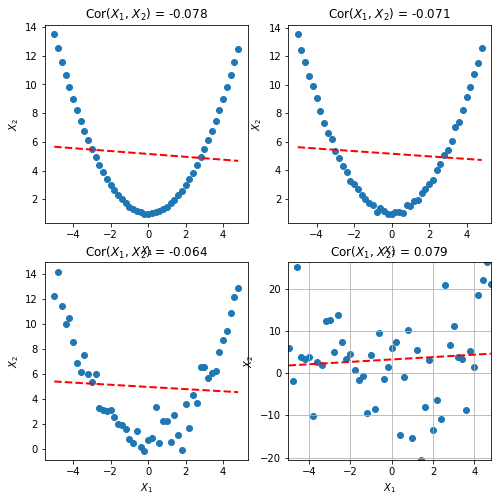

In [3]:
pylab.clf()
pylab.figure(num=None, figsize=(8, 8))

x = np.arange(-5, 5, 0.2)

pylab.subplot(221)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
_plot_correlation_func(x, y)

pylab.subplot(222)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
_plot_correlation_func(x, y)

pylab.subplot(223)
y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
_plot_correlation_func(x, y)

pylab.subplot(224)
y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
_plot_correlation_func(x, y)

pylab.autoscale(tight=True)
pylab.grid(True)

### Information Entropy

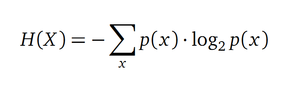

In [36]:
from IPython.core.display import Image, display
display(Image('http://2012.igem.org/wiki/images/thumb/7/71/DKL.png/300px-DKL.png', unconfined=False))

Information Entropy는 선형관계에만 국한되지 않는다.

다음에서 보듯이 이차함수관계에서도 Information Entropy를 적용할 수 있다.

In [4]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import os

from matplotlib import pylab
import numpy as np
from scipy.stats import norm, entropy

from utils import CHART_DIR


def mutual_info(x, y, bins=10):
    counts_xy, bins_x, bins_y = np.histogram2d(x, y, bins=(bins, bins))
    counts_x, bins = np.histogram(x, bins=bins)
    counts_y, bins = np.histogram(y, bins=bins)

    counts_xy += 1
    counts_x += 1
    counts_y += 1
    P_xy = counts_xy / np.sum(counts_xy, dtype=float)
    P_x = counts_x / np.sum(counts_x, dtype=float)
    P_y = counts_y / np.sum(counts_y, dtype=float)

    I_xy = np.sum(P_xy * np.log2(P_xy / (P_x.reshape(-1, 1) * P_y)))

    return I_xy / (entropy(counts_x) + entropy(counts_y))

def _plot_mi_func(x, y):

    mi = mutual_info(x, y)
    title = "NI($X_1$, $X_2$) = %.3f" % mi
    pylab.scatter(x, y)
    pylab.title(title)
    pylab.xlabel("$X_1$")
    pylab.ylabel("$X_2$")

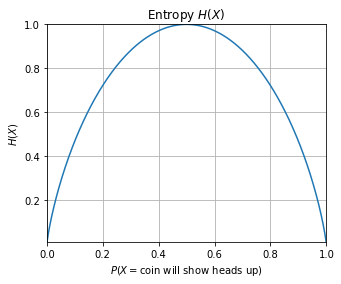

In [5]:
pylab.clf()
pylab.figure(num=None, figsize=(5, 4))

title = "Entropy $H(X)$"
pylab.title(title)
pylab.xlabel("$P(X=$coin will show heads up$)$")
pylab.ylabel("$H(X)$")

pylab.xlim(xmin=0, xmax=1.1)
x = np.arange(0.001, 1, 0.001)
y = -x * np.log2(x) - (1 - x) * np.log2(1 - x)
pylab.plot(x, y)
# pylab.xticks([w*7*24 for w in [0,1,2,3,4]], ['week %i'%(w+1) for w in
# [0,1,2,3,4]])

pylab.autoscale(tight=True)
pylab.grid(True)

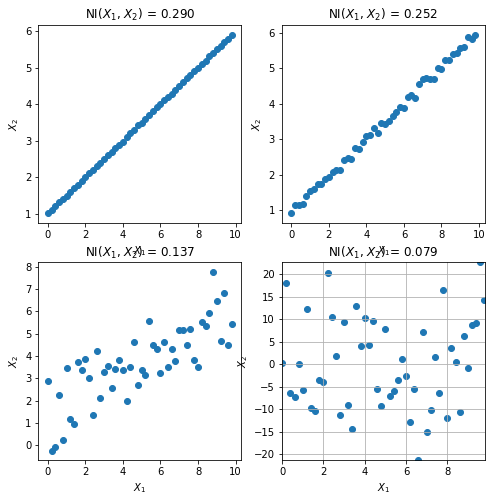

In [6]:
np.random.seed(0)  # to reproduce the data later on
pylab.clf()
pylab.figure(num=None, figsize=(8, 8))

x = np.arange(0, 10, 0.2)

pylab.subplot(221)
y = 0.5 * x + norm.rvs(1, scale=.01, size=len(x))
_plot_mi_func(x, y)

pylab.subplot(222)
y = 0.5 * x + norm.rvs(1, scale=.1, size=len(x))
_plot_mi_func(x, y)

pylab.subplot(223)
y = 0.5 * x + norm.rvs(1, scale=1, size=len(x))
_plot_mi_func(x, y)

pylab.subplot(224)
y = norm.rvs(1, scale=10, size=len(x))
_plot_mi_func(x, y)

pylab.autoscale(tight=True)
pylab.grid(True)

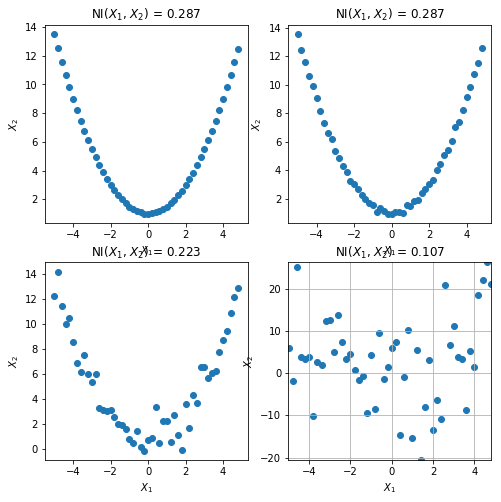

In [7]:
pylab.clf()
pylab.figure(num=None, figsize=(8, 8))

x = np.arange(-5, 5, 0.2)

pylab.subplot(221)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.01, size=len(x))
_plot_mi_func(x, y)

pylab.subplot(222)
y = 0.5 * x ** 2 + norm.rvs(1, scale=.1, size=len(x))
_plot_mi_func(x, y)

pylab.subplot(223)
y = 0.5 * x ** 2 + norm.rvs(1, scale=1, size=len(x))
_plot_mi_func(x, y)

pylab.subplot(224)
y = 0.5 * x ** 2 + norm.rvs(1, scale=10, size=len(x))
_plot_mi_func(x, y)

pylab.autoscale(tight=True)
pylab.grid(True)

- 장점 : 작은 속성 집합에서 잘 작동한다. 쓸모없는 속성을 제거하는 데 큰 도움이 된다.
- 단점 : 계산량이 많아서 고비용이다.  관찰하고자 하는 변수들이 독립적이어야 한다.

## 래퍼(wrapper)

속성에 대한 모델 찾기

- 개별 속성에 대해 모델 자체에 투표권을 준다.
- 모델 훈련 과정에 속성 중요도 계산이 추가된다. (속성 중요도는 이분법적으로 결정되지 않고 점수로 결정된다.)

## REF ( Recursive feature elimination )

- Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), __recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.__ First, the estimator is trained on the initial set of features and weights are assigned to each one of them. __Then, features whose absolute weights are the smallest are pruned from the current set features.__ That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [8]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing

# It is made available under the MIT License

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100, n_features=10, n_informative=3, random_state=0)

clf = LogisticRegression()
clf.fit(X, y)
print("%s\t/\t%s\t/\t%s" % ("# of features","index of features","rank of features"))
for i in range(1, 11):
    selector = RFE(clf, i)
    selector = selector.fit(X, y)
    print("%i\t%s\t%s" % (i, selector.support_, selector.ranking_))

# of features	/	index of features	/	rank of features
1	[False False False False False False False  True False False]	[ 7  6  3  4  8  9  2  1 10  5]
2	[False False False False False False  True  True False False]	[6 5 2 3 7 8 1 1 9 4]
3	[False False  True False False False  True  True False False]	[5 4 1 2 6 7 1 1 8 3]
4	[False False  True  True False False  True  True False False]	[4 3 1 1 5 6 1 1 7 2]
5	[False False  True  True False False  True  True False  True]	[3 2 1 1 4 5 1 1 6 1]
6	[False  True  True  True False False  True  True False  True]	[2 1 1 1 3 4 1 1 5 1]
7	[ True  True  True  True False False  True  True False  True]	[1 1 1 1 2 3 1 1 4 1]
8	[ True  True  True  True  True False  True  True False  True]	[1 1 1 1 1 2 1 1 3 1]
9	[ True  True  True  True  True  True  True  True False  True]	[1 1 1 1 1 1 1 1 2 1]
10	[ True  True  True  True  True  True  True  True  True  True]	[1 1 1 1 1 1 1 1 1 1]


In [9]:
selector = RFE(clf, 1)
selector = selector.fit(X, y)
print("Ranking(high priority) : %s" % selector.ranking_)

Ranking(high priority) : [ 7  6  3  4  8  9  2  1 10  5]


### Other feature selection method

- 결정 트리(Decision tree)
- 정규화(L1 Regularization-Lasso)

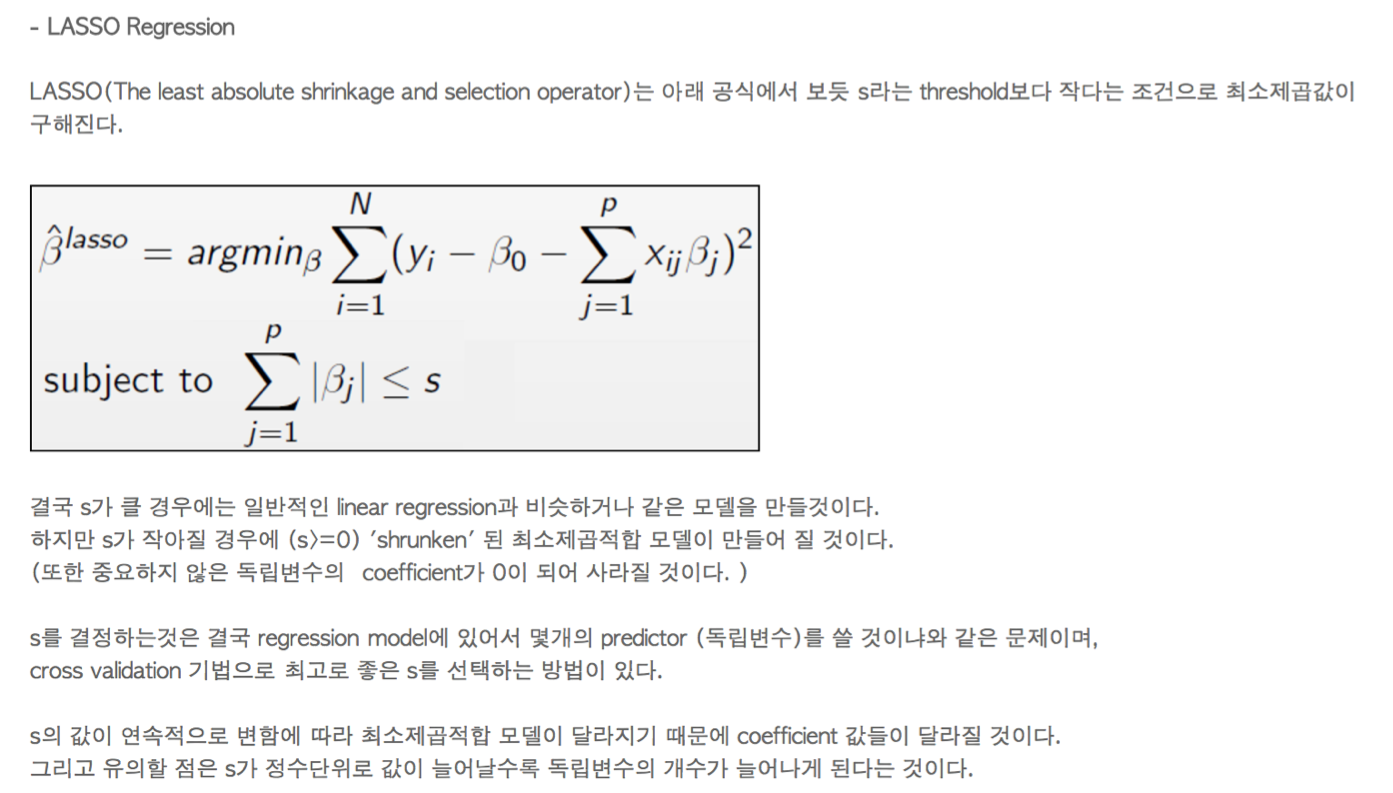

In [21]:
display(Image('./photo1.png', unconfined=False))

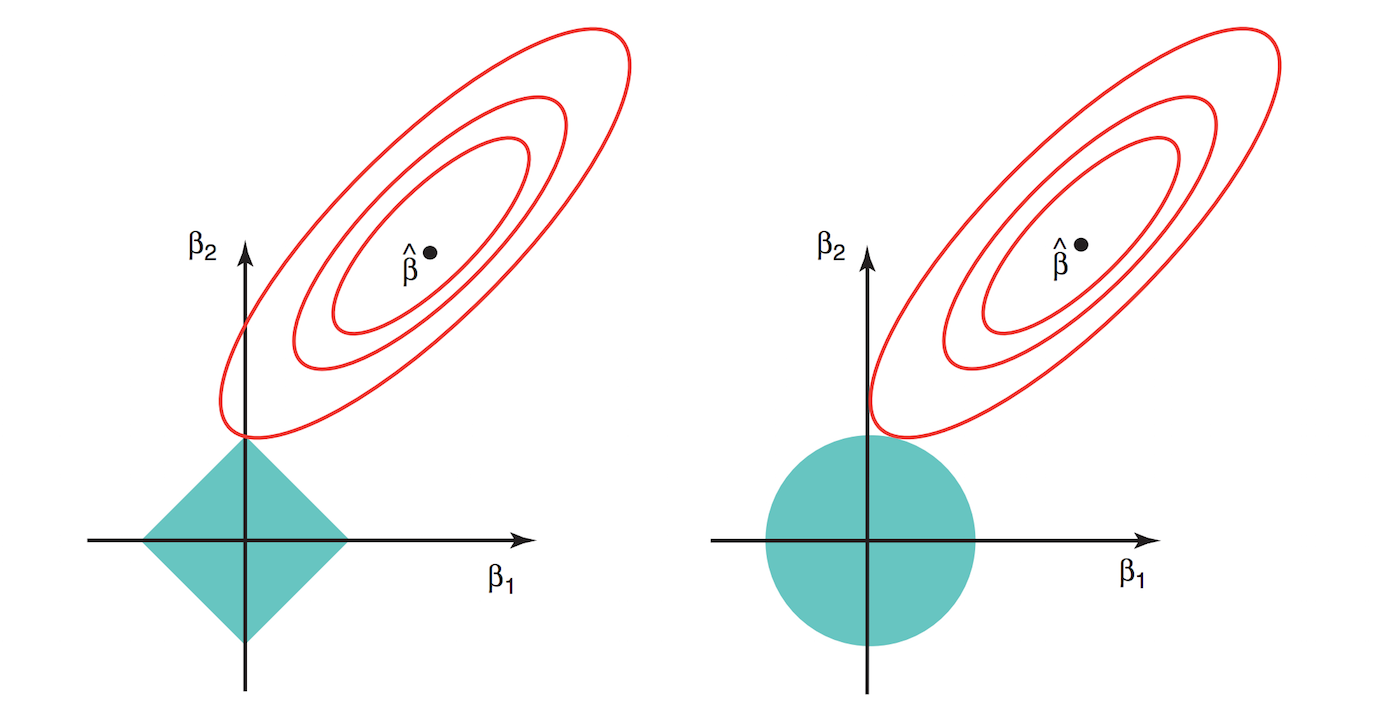

In [22]:
display(Image('http://freesearch.pe.kr/wp-content/uploads/lasso_fig-1.png', unconfined=False))

- __left : L1 Regulariztion - Lasso - remove some variables__
- right : L2 Regulariztion - Ridge - all variables

# 속성 추출( Feature extraction )

## linear feature extraction

### PCA (principal component Analysis)

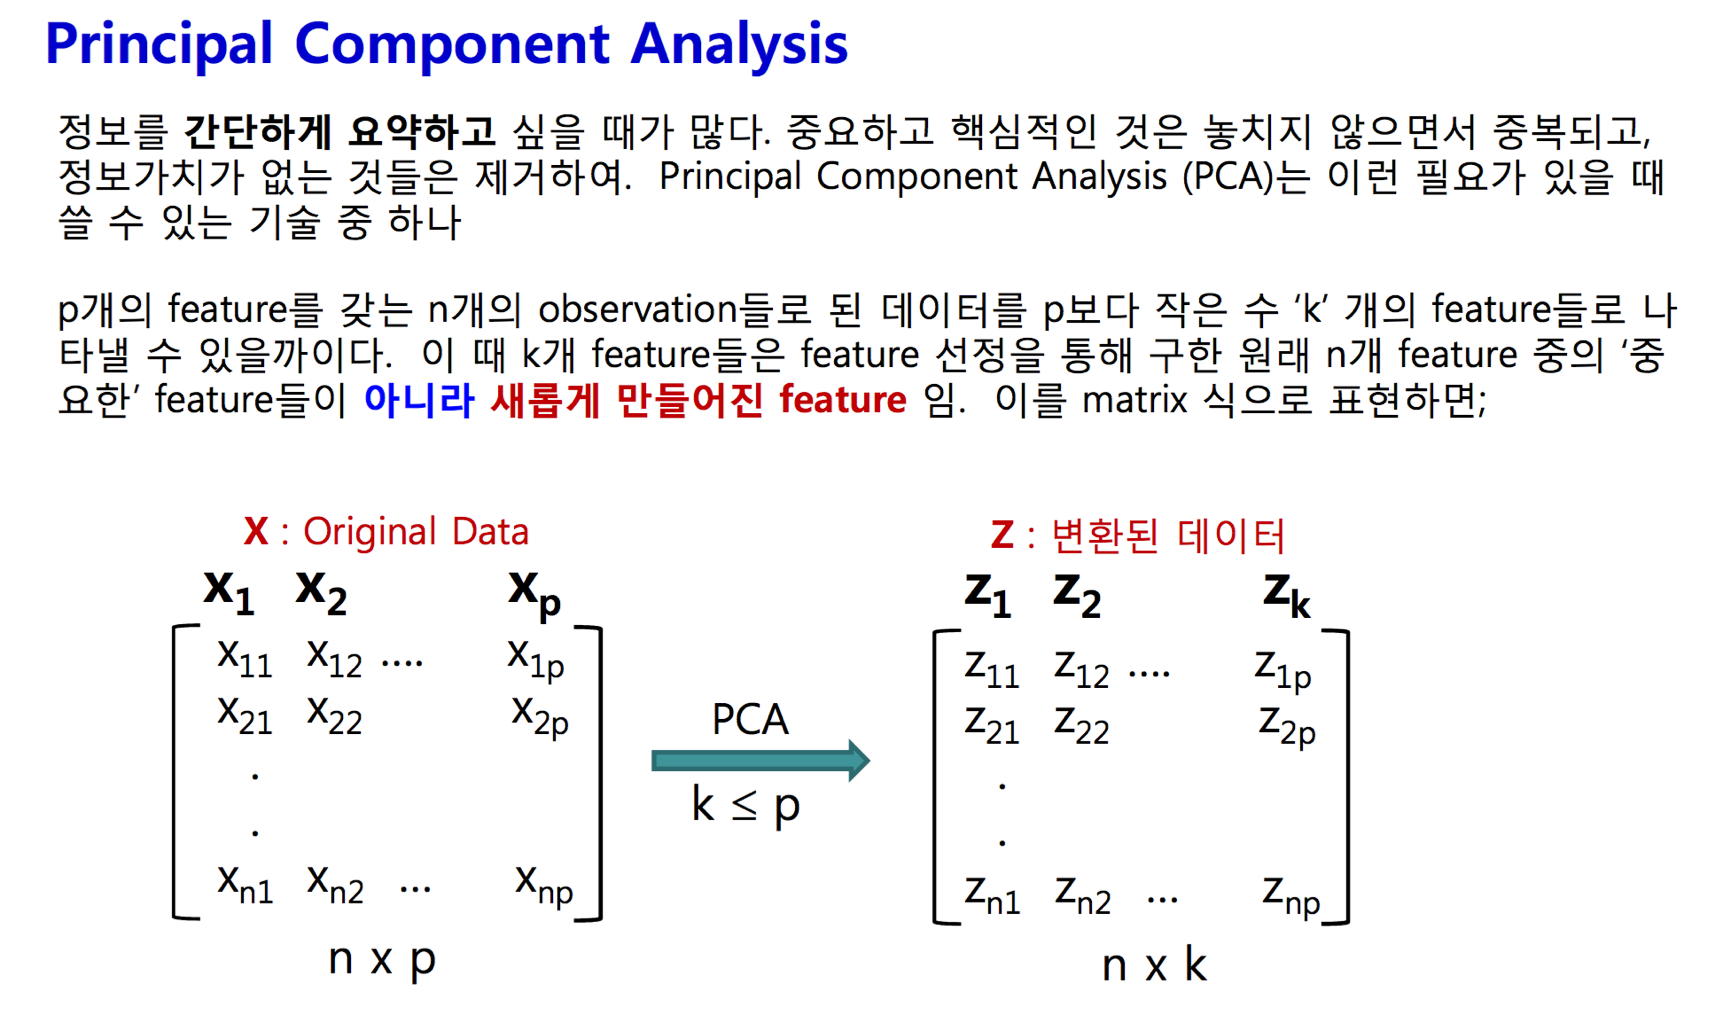

In [23]:
display(Image('./photo2.png', unconfined=False))

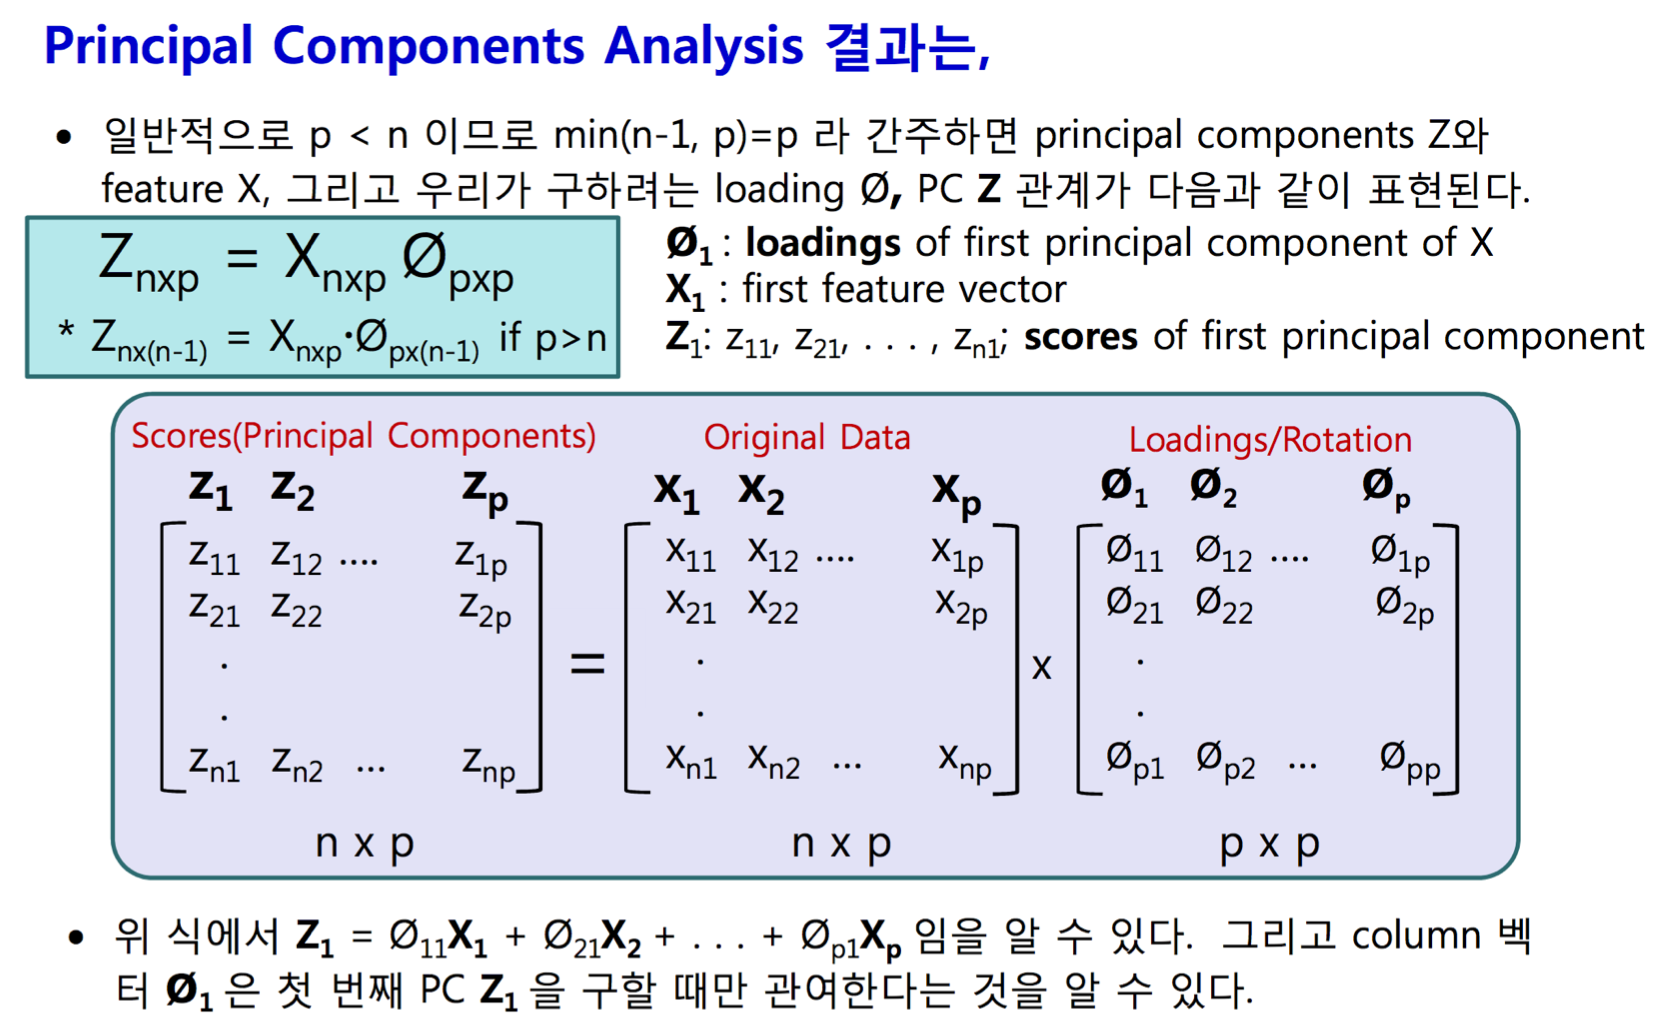

In [24]:
display(Image('./photo3.png', unconfined=False))

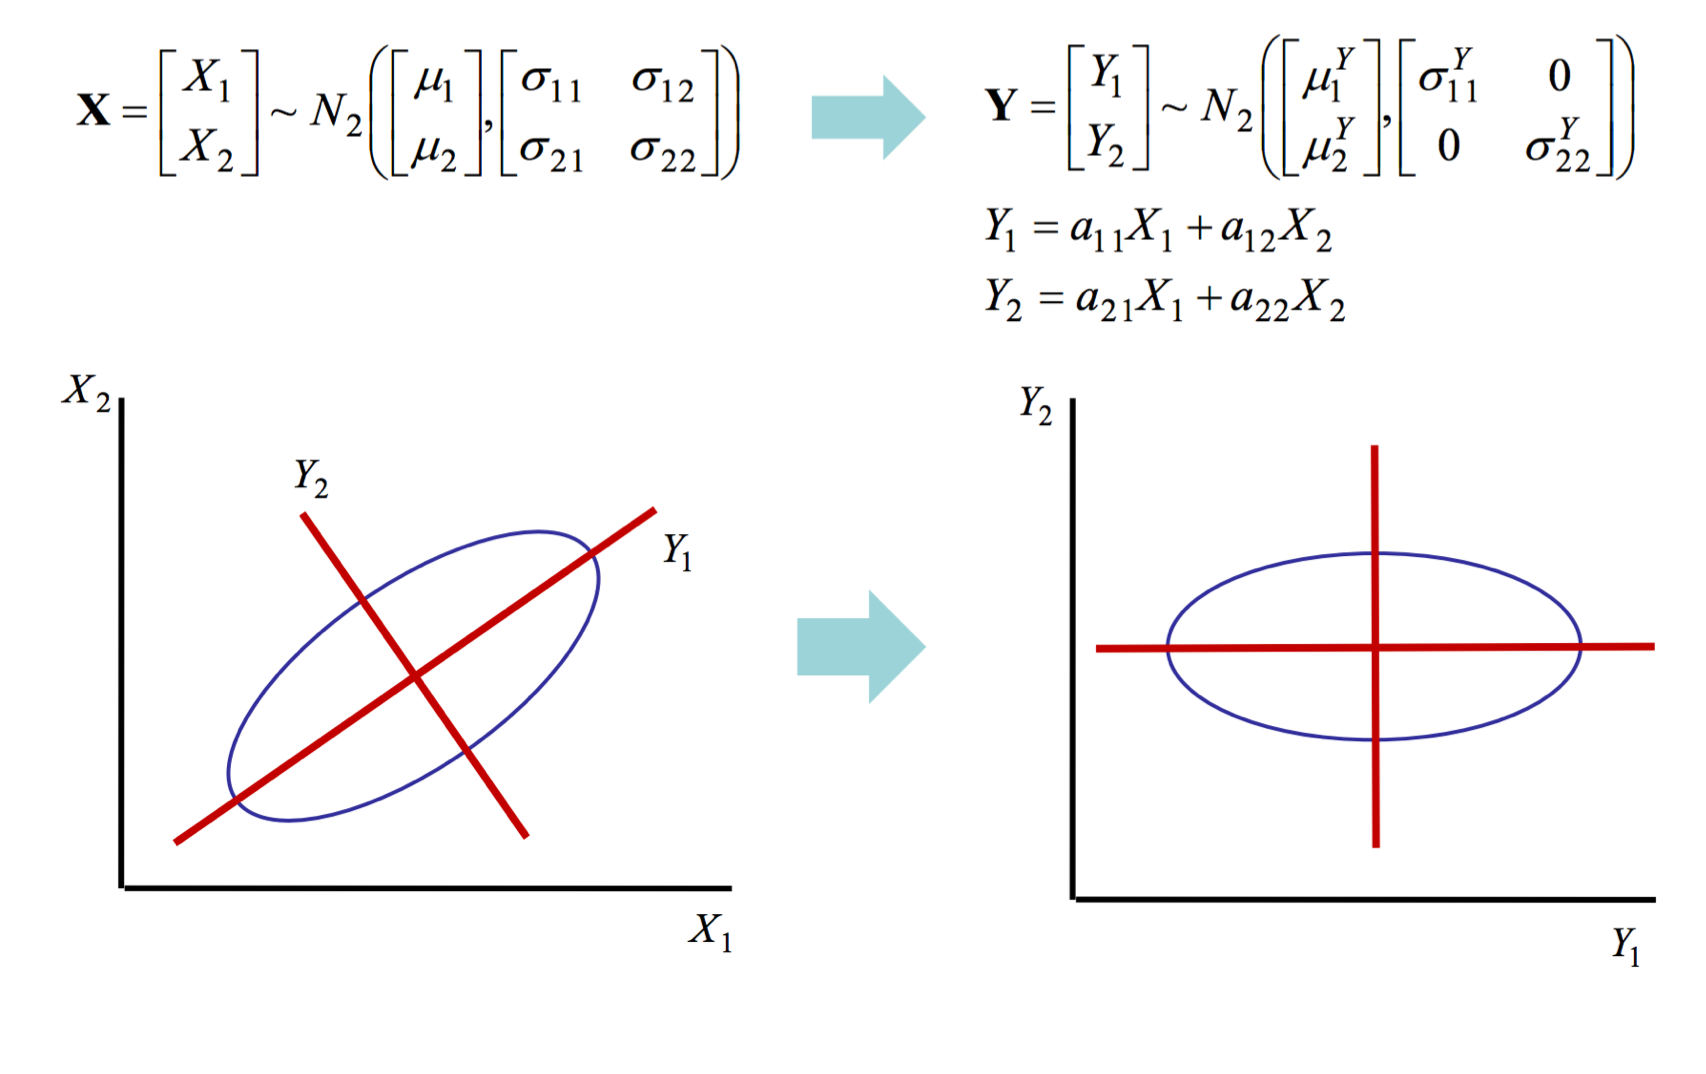

In [25]:
display(Image('./photo4.png', unconfined=False))

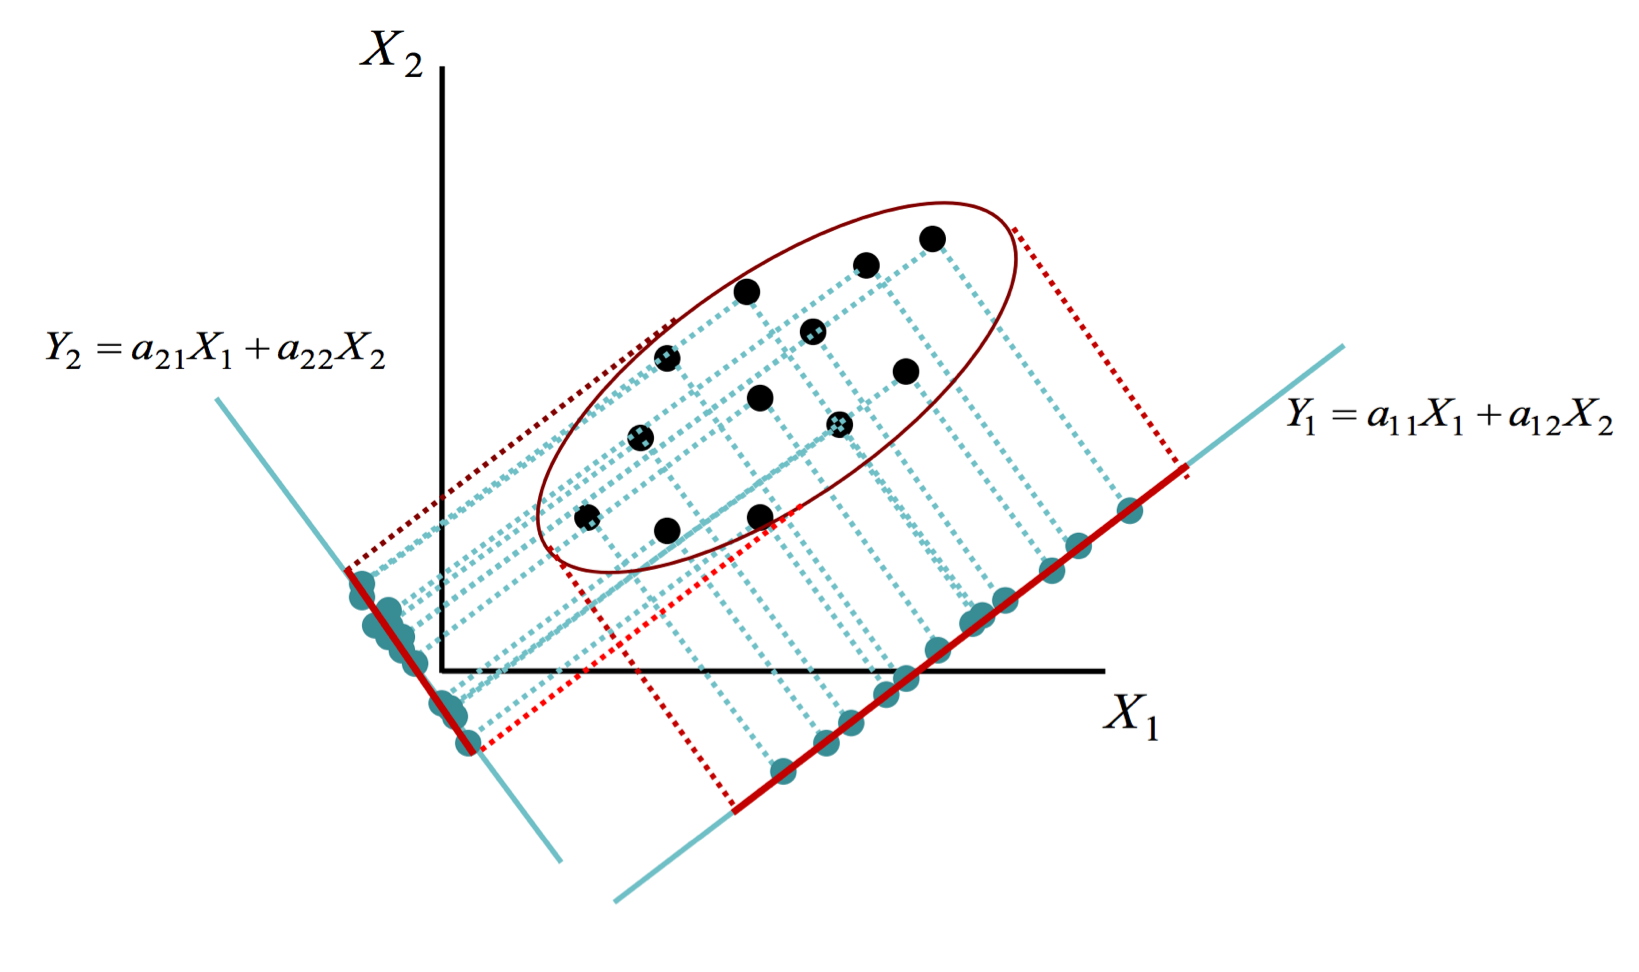

In [26]:
display(Image('./photo5.png', unconfined=False))

### LDA (Linear Discriminent Analysis)

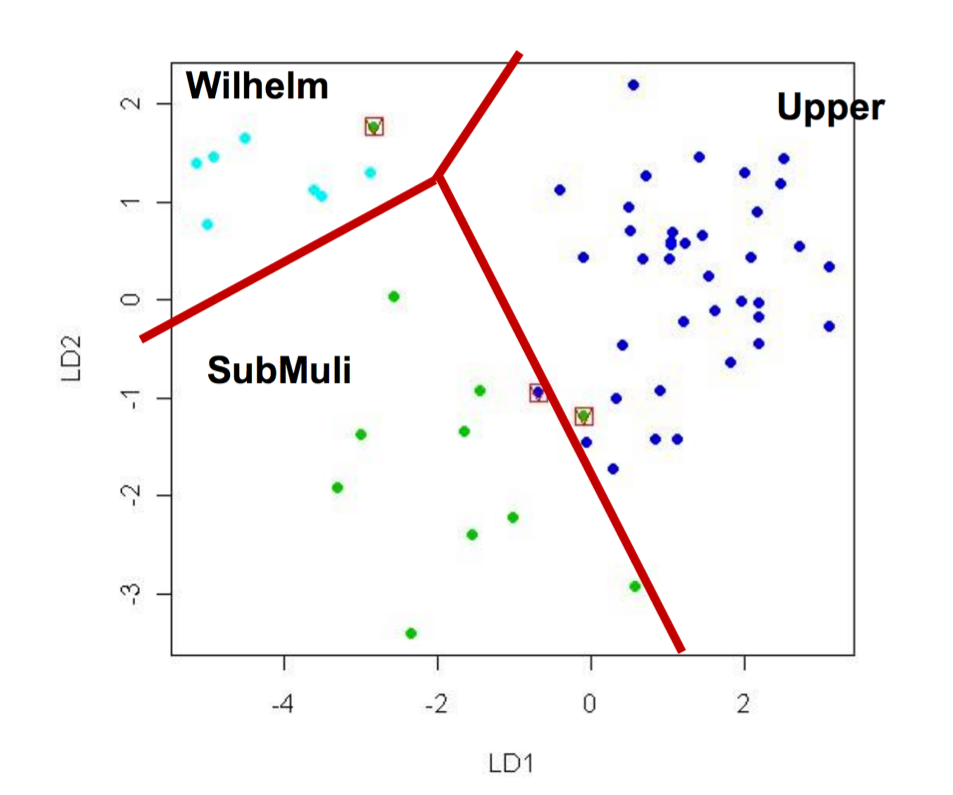

In [35]:
display(Image('./photo14.png', unconfined=False))

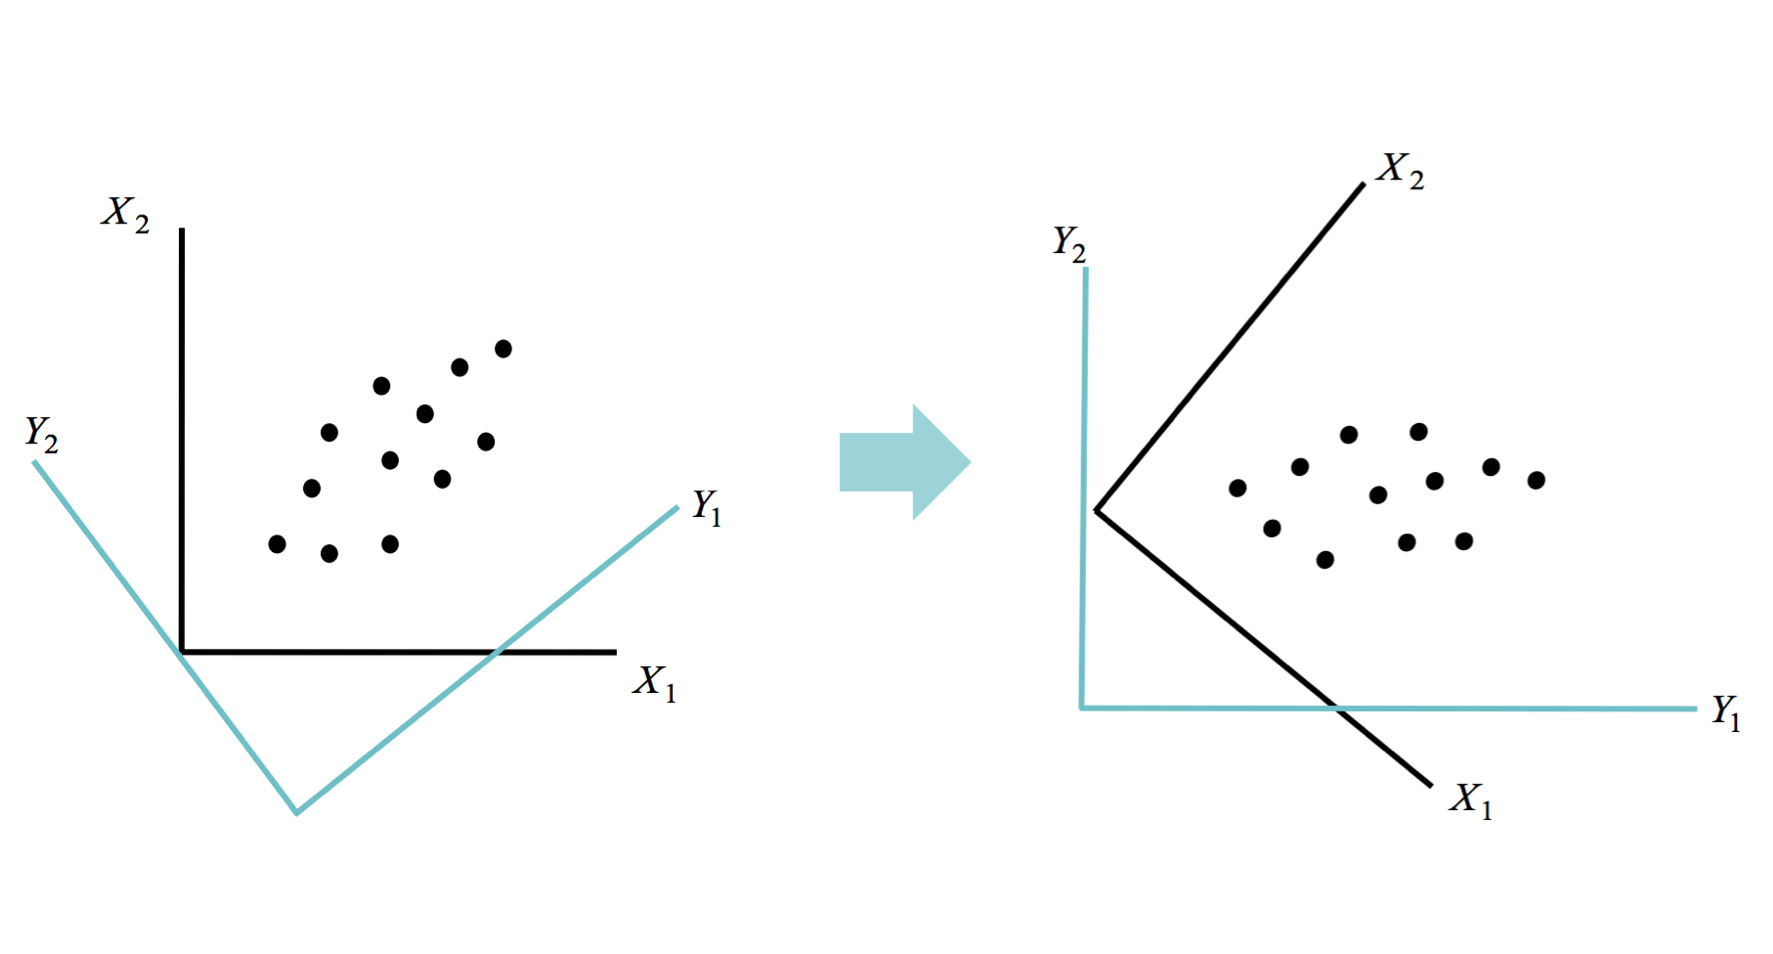

In [27]:
display(Image('./photo6.png', unconfined=False))

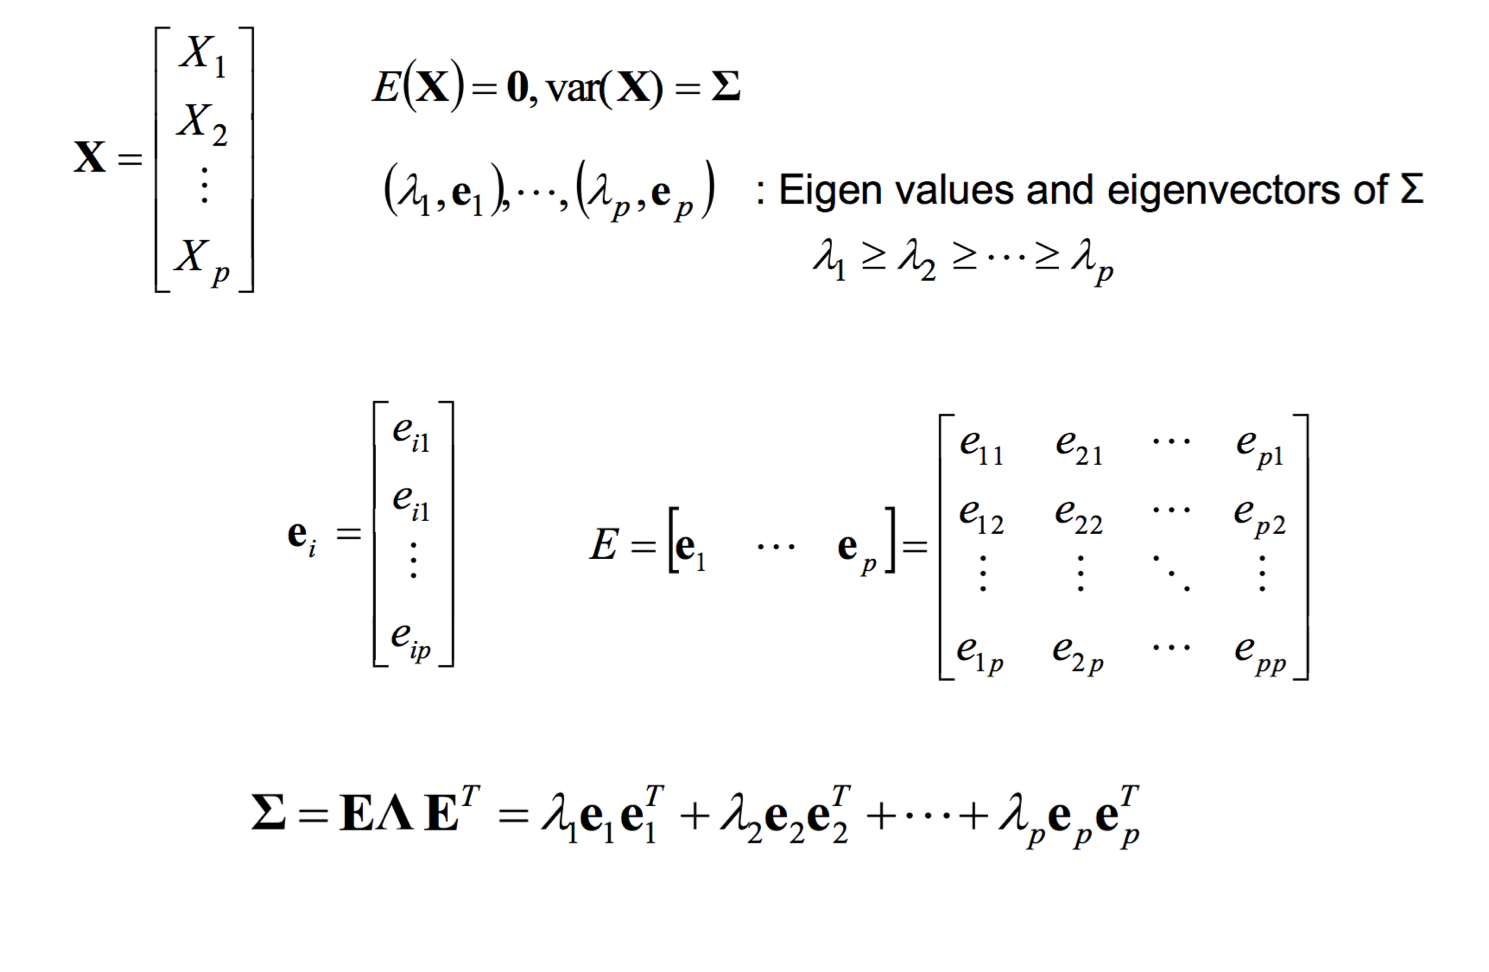

In [28]:
display(Image('./photo7.png', unconfined=False))

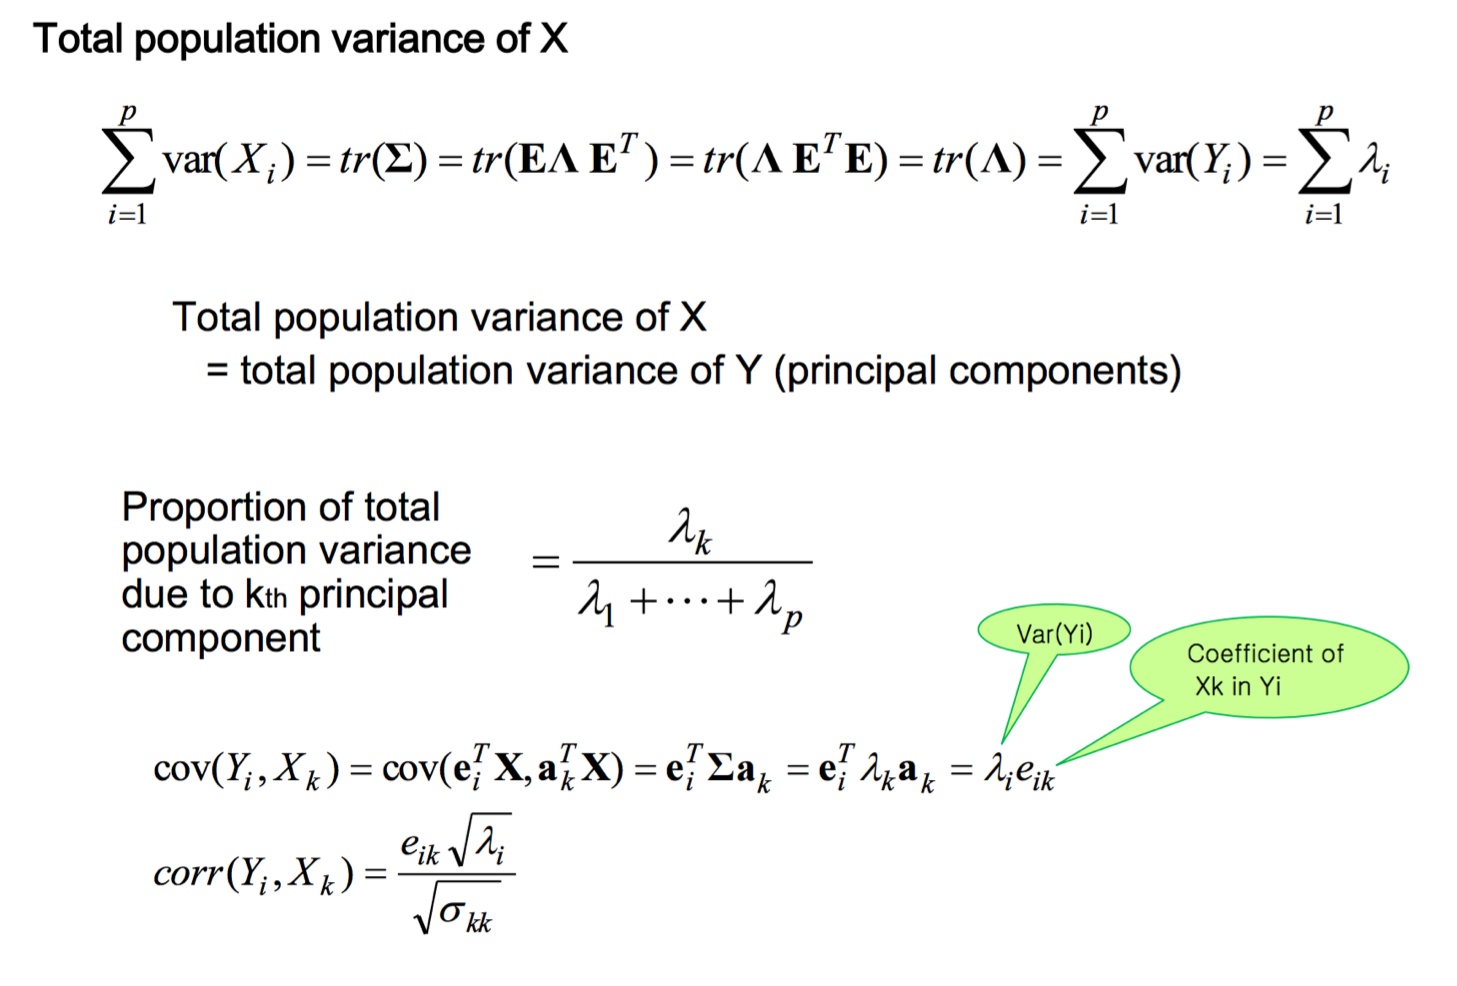

In [31]:
display(Image('./photo10.png', unconfined=False))

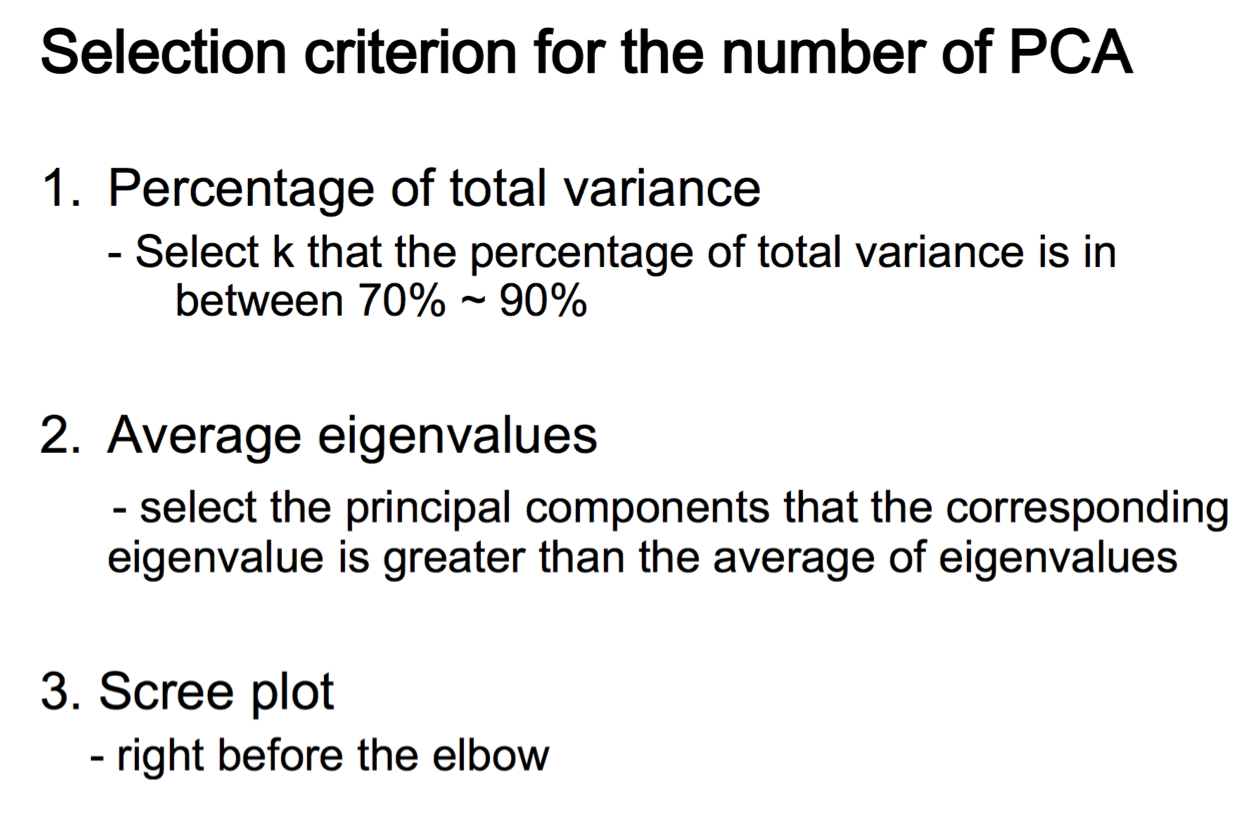

In [32]:
display(Image('./photo11.png', unconfined=False))

선형기법이지만 모델을 충분히 잘 학습시킨다.

PCA는 LDA처럼 다른 훈련 데이터에 민감하지 않다.

속성의 개수를 낮추거나 적용해야 할 속성 추출 기법을 모를 경우 주로 첫 번째로 시도하는 기법이다.

그래서 상황에 따라 맞는 방법을 찾아야 한다.

__PCA는 본래 속성 공간이 주어지면 PCA는 다음 특성이 있는 낮은 차원 공간으로 선형 투영을 찾는다.__

1. 보존된 분산을 최대화(maximize eigen values)
2. 최종 재생성 오차(변환된 속성에서 본래의 속성으로 돌아갈 때)를 최소화

단순히 입력 데이터를 변환하기 떄문에 분류와 회귀 문제 둘 다에 적용할 수 있다.

여기서는 분류 작업을 사용할 것이다.

###### PCA 알고리즘

- 데이터에서 평균 값을 뺴서 데이터를 중심에 놓는다.
- 공분산(covariance) 매트릭스를 계산한다.
- 공순산의 고유벡터(eigenvector)를 계산한다.

N개의 속성으로 선택하면 알고리즘은 변환된 N차원 속성을 반환한다.

In [ ]:
display(Image('./photo11.png', unconfined=False))

In [ ]:
display(Image('./photo11.png', unconfined=False))

In [11]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import os

from matplotlib import pylab
import numpy as np

from sklearn import linear_model, decomposition
from sklearn import lda

%matplotlib inline
logistic = linear_model.LogisticRegression()


from utils import CHART_DIR


/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


__Example 1__

- PCA

[ 0.96393127]


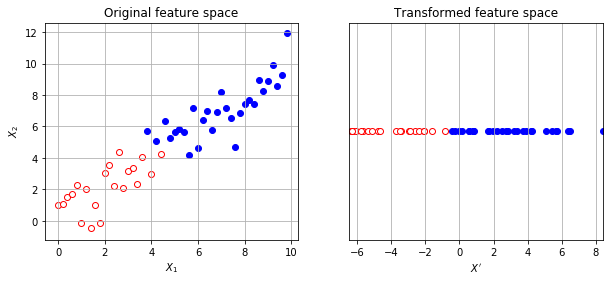

In [12]:
np.random.seed(3)

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

pylab.clf()
fig = pylab.figure(num=None, figsize=(10, 4))
pylab.subplot(121)

title = "Original feature space"
pylab.title(title)
pylab.xlabel("$X_1$")
pylab.ylabel("$X_2$")

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

good = (x1 > 5) | (x2 > 5)
bad = ~good

x1g = x1[good]
x2g = x2[good]
pylab.scatter(x1g, x2g, edgecolor="blue", facecolor="blue")

x1b = x1[bad]
x2b = x2[bad]
pylab.scatter(x1b, x2b, edgecolor="red", facecolor="white")

pylab.grid(True)

pylab.subplot(122)

X = np.c_[(x1, x2)]

pca = decomposition.PCA(n_components=1)
Xtrans = pca.fit_transform(X)

Xg = Xtrans[good]
Xb = Xtrans[bad]

pylab.scatter(
    Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue")
pylab.scatter(
    Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white")
title = "Transformed feature space"
pylab.title(title)
pylab.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

print(pca.explained_variance_ratio_)

pylab.grid(True)

pylab.autoscale(tight=True)

__Example 2__

- PCA (Unsupervised) : 가장 높은 분산을 가지는 축을 찾아준다.

단점
- 선형기법인 PCA는 비선형 데이터를 다룰 때 그 한계를 보인다. 
- 공간 분류 문제에 적용할 때 그 한계가 있다.

[ 0.98318496]


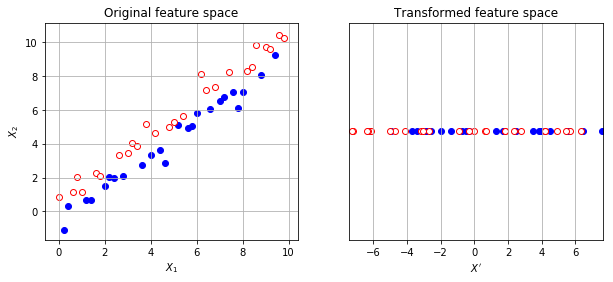

In [13]:
pylab.clf()
fig = pylab.figure(num=None, figsize=(10, 4))
pylab.subplot(121)

title = "Original feature space"
pylab.title(title)
pylab.xlabel("$X_1$")
pylab.ylabel("$X_2$")

x1 = np.arange(0, 10, .2)
x2 = x1 + np.random.normal(scale=1, size=len(x1))

good = x1 > x2
bad = ~good

x1g = x1[good]
x2g = x2[good]
pylab.scatter(x1g, x2g, edgecolor="blue", facecolor="blue")

x1b = x1[bad]
x2b = x2[bad]
pylab.scatter(x1b, x2b, edgecolor="red", facecolor="white")

pylab.grid(True)

pylab.subplot(122)

X = np.c_[(x1, x2)]

pca = decomposition.PCA(n_components=1)
Xtrans = pca.fit_transform(X)

Xg = Xtrans[good]
Xb = Xtrans[bad]

pylab.scatter(
    Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue")
pylab.scatter(
    Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white")
title = "Transformed feature space"
pylab.title(title)
pylab.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

print(pca.explained_variance_ratio_)

pylab.grid(True)

pylab.autoscale(tight=True)

- LDA (supervised) : 그룹내 분산은 작고, 그룹간 분산이 큰 축을 찾아준다.

단점
- 범주의 수는 증가하고 각 범주마다 샘플이 적다면 LDA는 잘 실행되지 않는다.

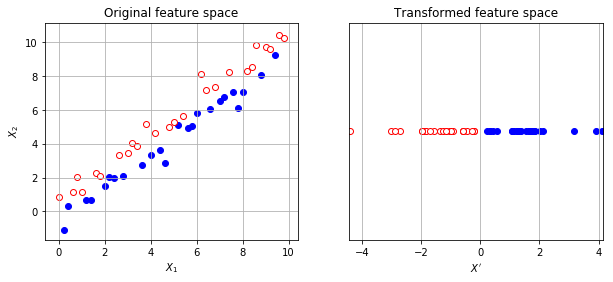

In [14]:
pylab.clf()
fig = pylab.figure(num=None, figsize=(10, 4))
pylab.subplot(121)

title = "Original feature space"
pylab.title(title)
pylab.xlabel("$X_1$")
pylab.ylabel("$X_2$")

good = x1 > x2
bad = ~good

x1g = x1[good]
x2g = x2[good]
pylab.scatter(x1g, x2g, edgecolor="blue", facecolor="blue")

x1b = x1[bad]
x2b = x2[bad]
pylab.scatter(x1b, x2b, edgecolor="red", facecolor="white")

pylab.grid(True)

pylab.subplot(122)

X = np.c_[(x1, x2)]

lda_inst = lda.LDA(n_components=1)
Xtrans = lda_inst.fit_transform(X, good)

Xg = Xtrans[good]
Xb = Xtrans[bad]

pylab.scatter(
    Xg[:, 0], np.zeros(len(Xg)), edgecolor="blue", facecolor="blue")
pylab.scatter(
    Xb[:, 0], np.zeros(len(Xb)), edgecolor="red", facecolor="white")
title = "Transformed feature space"
pylab.title(title)
pylab.xlabel("$X'$")
fig.axes[1].get_yaxis().set_visible(False)

pylab.grid(True)

pylab.autoscale(tight=True)

## non linear featrue extraction

### MDS (multi dimensional scaling)

차원을 축소할 떄 가능한 한 많이 상대적인 거리를 보유하고자 한다.

이는 고차원 데이터 셋에 대해 시각적 개괄을 얻고자 할 때 유용하다.

데이터 점 자체에 연연하지 않고, 대신에 __데이터 점들 짝 간의 차이점__에 관심을 갖고 __거리__로서 이들을 해석한다.

MDS는 본래 공간에서의 점들 거리와 최대한 유사한 새로운 거리로 낮은 차원 공간에 개별 데이터 점을 놓는다.

MDS는 시각화를 위해 자주 사용되기 때문에,, 낮은 차원의 선택이 대부분 2, 3이다.

In [15]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import os

import numpy as np
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D

from sklearn import linear_model, manifold, decomposition, datasets
logistic = linear_model.LogisticRegression()

from utils import CHART_DIR

/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  del sys.path[0]


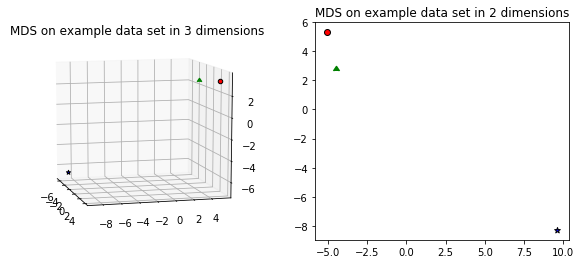

In [16]:
np.random.seed(3)

# all examples will have three classes in this file
colors = ['r', 'g', 'b']
markers = ['o', 6, '*']

X = np.c_[np.ones(5), 2 * np.ones(5), 10 * np.ones(5)].T
y = np.array([0, 1, 2])

fig = pylab.figure(figsize=(10, 4))

ax = fig.add_subplot(121, projection='3d')
ax.set_axis_bgcolor('white')

mds = manifold.MDS(n_components=3)
Xtrans = mds.fit_transform(X)

for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
pylab.title("MDS on example data set in 3 dimensions")
ax.view_init(10, -15)

mds = manifold.MDS(n_components=2)
Xtrans = mds.fit_transform(X)

ax = fig.add_subplot(122)
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
pylab.title("MDS on example data set in 2 dimensions")

/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  # Remove the CWD from sys.path while we load stuff.


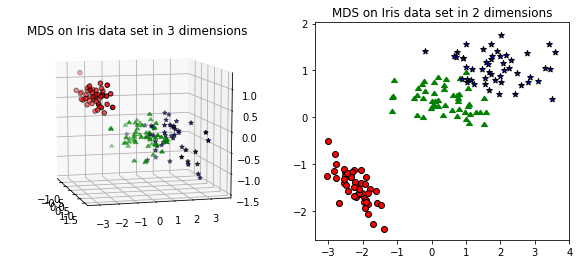

In [17]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# MDS

fig = pylab.figure(figsize=(10, 4))

ax = fig.add_subplot(121, projection='3d')
ax.set_axis_bgcolor('white')

mds = manifold.MDS(n_components=3)
Xtrans = mds.fit_transform(X)

for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
pylab.title("MDS on Iris data set in 3 dimensions")
ax.view_init(10, -15)

mds = manifold.MDS(n_components=2)
Xtrans = mds.fit_transform(X)

ax = fig.add_subplot(122)
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
pylab.title("MDS on Iris data set in 2 dimensions")

/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


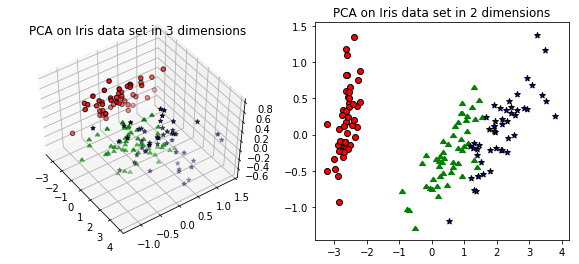

In [18]:
# PCA

fig = pylab.figure(figsize=(10, 4))

ax = fig.add_subplot(121, projection='3d')
ax.set_axis_bgcolor('white')

pca = decomposition.PCA(n_components=3)
Xtrans = pca.fit(X).transform(X)

for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
pylab.title("PCA on Iris data set in 3 dimensions")
ax.view_init(50, -35)

pca = decomposition.PCA(n_components=2)
Xtrans = pca.fit_transform(X)

ax = fig.add_subplot(122)
for cl, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(
        Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
pylab.title("PCA on Iris data set in 2 dimensions")

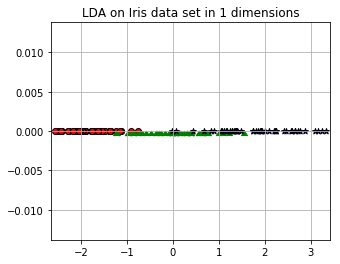

In [37]:
# LDA

from sklearn import linear_model, decomposition
from sklearn import lda

pylab.figure(num=None,figsize=(5, 4))
title = "LDA on Iris data set in 1 dimensions"
pylab.title(title)

pylab.xlim(xmin=-4, xmax=4)

lda_inst = lda.LDA(n_components=3)
Xtrans = lda_inst.fit_transform(X, y==cl)

for cl, color, marker in zip(np.unique(y), colors, markers):
    pylab.scatter(Xtrans[y == cl][:, 0], np.zeros(len(Xtrans[y==cl])) , c=color, marker=marker, edgecolor='black')

pylab.autoscale(tight=True)
pylab.grid(True)